In [3]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

Using TensorFlow backend.


In [ ]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("./training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("./validation.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [2]:
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200), metrics=['accuracy'])

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

NameError: name 'Sequential' is not defined

In [ ]:
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

('Training Set R-Square=', 0.9977097119462709)


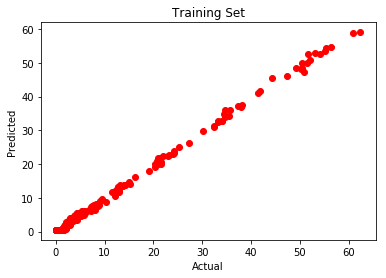

In [4]:
# Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

('Validation Set R-Square=', 0.9939924100379952)


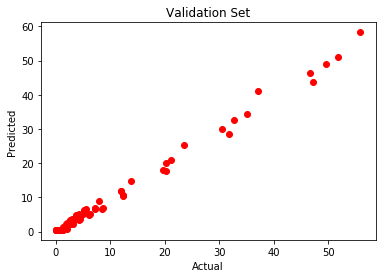

In [5]:
# Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)